Name: Tong ZHAO

Email: tong.zhao@eleves.enpc.fr

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

## Parameters

In [3]:
# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

## Dataset Generator

In [173]:
def generate_a_drawing(figsize, U, V, noise=0.0, pair=True):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata_noise = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    
    if pair:
        return imdata, imdata_noise
    else:
        return imdata_noise

In [148]:
def generate_a_rectangle(noise=0.0, free_location=False, pair=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise, pair=pair)

In [149]:
def generate_a_disk(noise=0.0, free_location=False, pair=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise, pair=pair)

In [150]:
def generate_a_triangle(noise=0.0, free_location=False, pair=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise, pair=pair)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

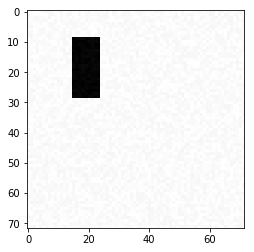

In [292]:
im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

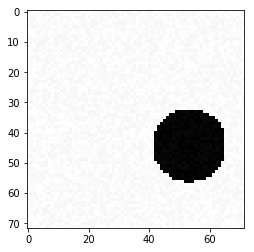

In [435]:
im = generate_a_disk(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

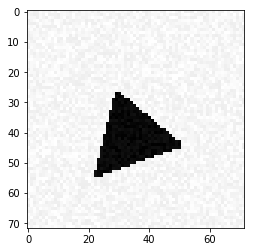

In [399]:
[im, v] = generate_a_triangle(20, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

In [11]:
def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [12]:
def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

In [13]:
def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

In [14]:
def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

In [15]:
def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

In [16]:
def plot_linear_classifier_history(history):
    plt.figure(figsize = (15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['acc'])
    plt.xlabel("Epoch")
    plt.ylabel("Acc")
    plt.title("Accuracy on Train")
    plt.grid()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss on Train")
    plt.grid()
    
    plt.show()

In [109]:
def plot_regression_history(history):
    plt.figure()
    plt.plot(history.history['loss'])
    plt.xlabel("Epoch")
    plt.ylabel("loss")
    plt.title("Loss on Train")
    plt.grid()
    plt.show()

## Simple Classification

In [24]:
X_train, Y_train = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam
from keras.utils import np_utils

In [85]:
Y_train_onehot = np_utils.to_categorical(Y_train)
labels = dict(zip(range(3), ["rectangle", "disk", "triangle"]))

### SGD

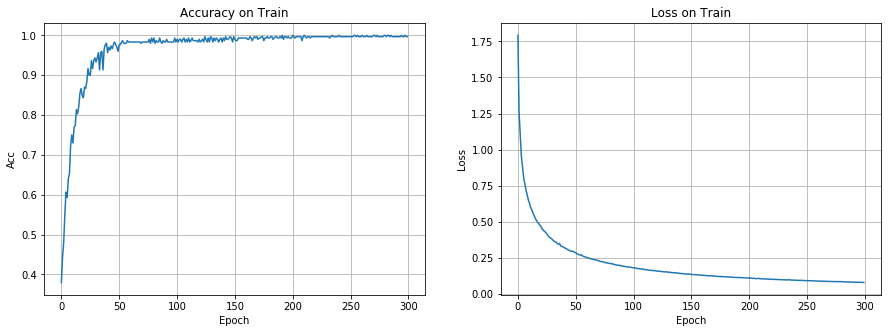

In [92]:
model = Sequential()
model.add(Dense(input_dim = X_train.shape[1], units = 3, activation = "softmax", kernel_initializer = "normal"))

sgd = SGD(lr = 1e-4, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
history = model.fit(X_train, Y_train_onehot, epochs = 300, verbose = 0)
plot_linear_classifier_history(history)

### ADAM

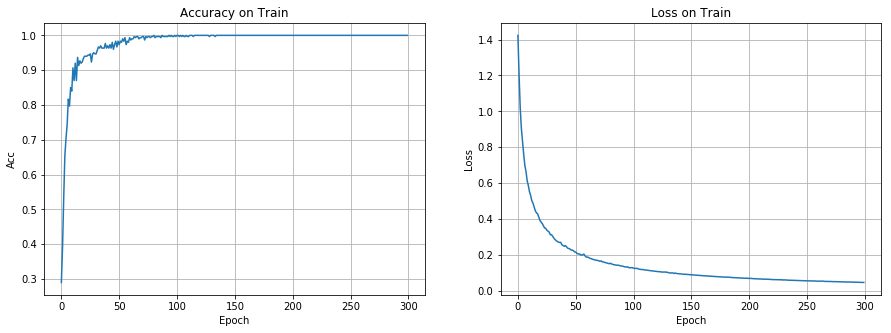

In [99]:
model_adam = Sequential()
model_adam.add(Dense(input_dim = X_train.shape[1], units = 3, activation = "softmax", kernel_initializer = "normal"))

adam = Adam(lr = 1e-4, decay = 1e-3)
model_adam.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
history_adam = model_adam.fit(X_train, Y_train_onehot, epochs = 300, verbose = 0)
plot_linear_classifier_history(history_adam)

### Test

In [100]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
pred_sgd = labels[np.argmax(model.predict(X_test))]
pred_adam = labels[np.argmax(model_adam.predict(X_test))]

print("Test model with a disk:")
print("-" * 30)
print("Model with SGD optimizer : %s" % pred_sgd)
print("Model with ADAM optimizer: %s" % pred_adam)

Test model with a disk:
------------------------------
Model with SGD optimizer : disk
Model with ADAM optimizer: disk


In [101]:
X_test = generate_a_rectangle()
X_test = X_test.reshape(1, X_test.shape[0])
pred_sgd = labels[np.argmax(model.predict(X_test))]
pred_adam = labels[np.argmax(model_adam.predict(X_test))]

print("Test model with a rectangle:")
print("-" * 30)
print("Model with SGD optimizer : %s" % pred_sgd)
print("Model with ADAM optimizer: %s" % pred_adam)

Test model with a rectangle:
------------------------------
Model with SGD optimizer : rectangle
Model with ADAM optimizer: rectangle


In [102]:
X_test = generate_a_triangle()[0]
X_test = X_test.reshape(1, X_test.shape[0])
pred_sgd = labels[np.argmax(model.predict(X_test))]
pred_adam = labels[np.argmax(model_adam.predict(X_test))]

print("Test model with a triangle:")
print("-" * 30)
print("Model with SGD optimizer : %s" % pred_sgd)
print("Model with ADAM optimizer: %s" % pred_adam)

Test model with a triangle:
------------------------------
Model with SGD optimizer : triangle
Model with ADAM optimizer: triangle


## Visualization of the Solution

In [119]:
def visualize_column(weights, title):
    
    plt.figure(figsize = (20, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(weights[:, 0].reshape((IMAGE_SIZE, IMAGE_SIZE)))
    plt.title("First Column")
    plt.subplot(1, 3, 2)
    plt.imshow(weights[:, 1].reshape((IMAGE_SIZE, IMAGE_SIZE)))
    plt.title("Second Column")
    plt.subplot(1, 3, 3)
    plt.imshow(weights[:, 2].reshape((IMAGE_SIZE, IMAGE_SIZE)))
    plt.title("Third Column")
    plt.suptitle(title)
    plt.show()

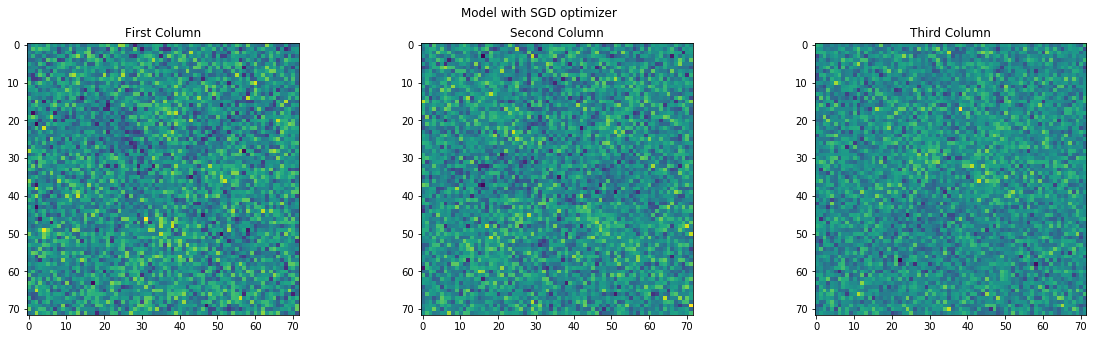

In [120]:
visualize_column(model.get_weights()[0], "Model with SGD optimizer")

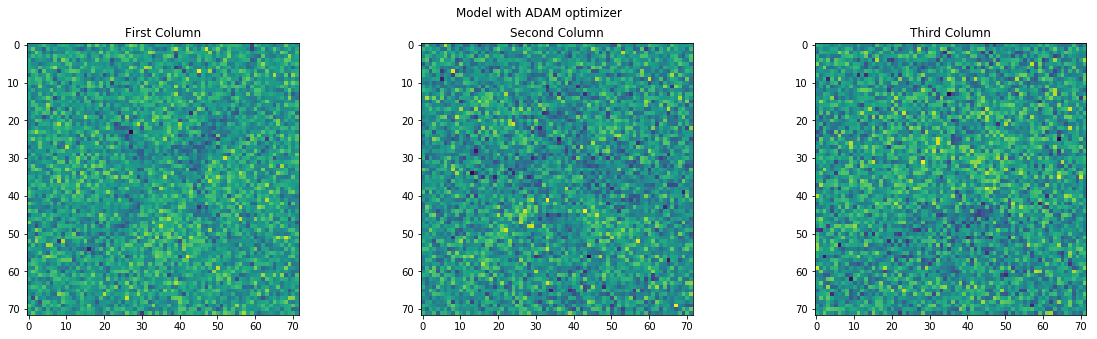

In [121]:
visualize_column(model_adam.get_weights()[0], "Model with ADAM optimizer")

## A More Difficult Classification Problem

In [123]:
X_train, Y_train = generate_dataset_classification(300, 20, True)
Y_train_onehot = np_utils.to_categorical(Y_train)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


### SGD

Learning rate increases and decay increases. Train more epoch

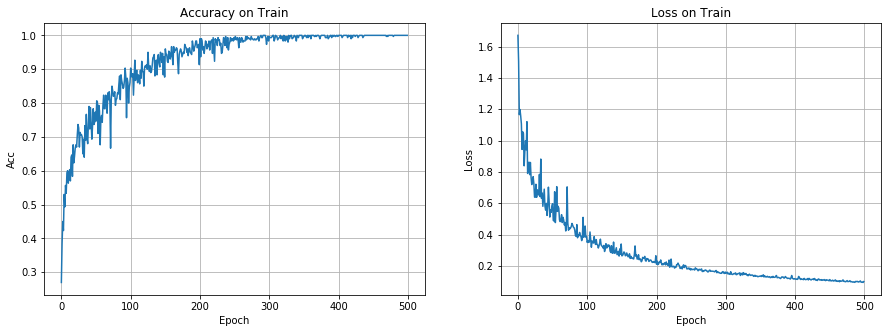

In [133]:
model = Sequential()
model.add(Dense(input_dim = X_train.shape[1], units = 3, activation = "softmax", kernel_initializer = "normal"))

sgd = SGD(lr = 1e-3, decay = 1e-5, momentum = 0.9, nesterov = True)
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])
history = model.fit(X_train, Y_train_onehot, epochs = 500, verbose = 0)
plot_linear_classifier_history(history)

### ADAM

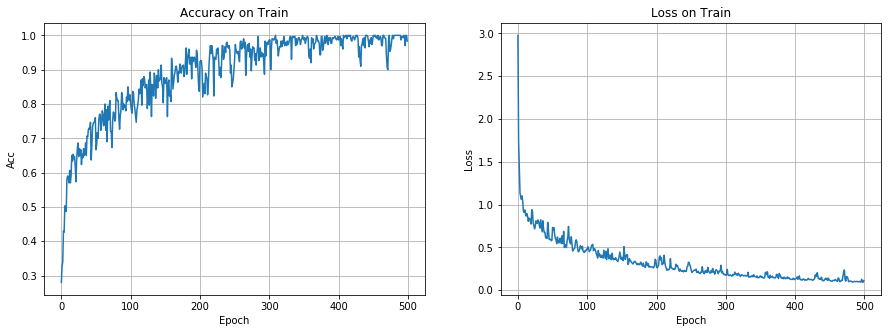

In [146]:
model_adam = Sequential()
model_adam.add(Dense(input_dim = X_train.shape[1], units = 3, activation = "softmax", kernel_initializer = "normal"))

adam = Adam(lr = 1e-3, decay = 1e-4)
model_adam.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
history_adam = model_adam.fit(X_train, Y_train_onehot, epochs = 500, verbose = 0)
plot_linear_classifier_history(history_adam)

### Test

In [29]:
X_test, Y_test = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [159]:
metric_values = model.evaluate(X_test, Y_test)
metric_names = model.metrics_names

print("Evaluate the model with SGD optimizer:")
print("-" * 30)
for i, metric in enumerate(metric_names):
    print("%5s: %f" % (metric, metric_values[i]))

300/300 [==============================] - 0s 80us/step
Evaluate the model with SGD optimizer:
------------------------------
 loss: 0.986495
  acc: 0.636667


In [160]:
metric_values = model_adam.evaluate(X_test, Y_test)
metric_names = model_adam.metrics_names

print("Evaluate the model with ADAM optimizer:")
print("-" * 30)
for i, metric in enumerate(metric_names):
    print("%5s: %f" % (metric, metric_values[i]))

300/300 [==============================] - 0s 44us/step
Evaluate the model with ADAM optimizer:
------------------------------
 loss: 0.972138
  acc: 0.626667


### Deep Network

In [96]:
import tensorflow as tf
from keras.layers import Dropout, Convolution2D, GlobalAveragePooling2D, merge, MaxPool2D, Flatten
from keras import backend as K

In [20]:
X_train, Y_train = generate_dataset_classification(3000, 20, True)
X_train = X_train.reshape((-1, IMAGE_SIZE, IMAGE_SIZE, 1))
Y_train_onehot = np_utils.to_categorical(Y_train)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

In [32]:
model_allconv = Sequential()

model_allconv.add(Convolution2D(96, 3, padding = "valid", input_shape = (IMAGE_SIZE, IMAGE_SIZE, 1)))
model_allconv.add(Activation("relu"))
model_allconv.add(Convolution2D(96, 3, padding = "valid"))
model_allconv.add(Activation("relu"))
model_allconv.add(Convolution2D(96, 3, padding = "valid", strides = (2, 2)))
model_allconv.add(Dropout(0.5))

model_allconv.add(Convolution2D(192, 3, padding = "valid"))
model_allconv.add(Activation("relu"))
model_allconv.add(Convolution2D(192, 3, padding = "valid"))
model_allconv.add(Activation("relu"))
model_allconv.add(Convolution2D(192, 3, padding = "valid", strides = (2, 2)))
model_allconv.add(Dropout(0.5))

model_allconv.add(Convolution2D(192, 3, padding = "valid"))
model_allconv.add(Activation("relu"))
model_allconv.add(Convolution2D(192, 1, padding = "valid"))
model_allconv.add(Activation("relu"))
model_allconv.add(Convolution2D(3, 1, padding = "valid"))

model_allconv.add(GlobalAveragePooling2D())
model_allconv.add(Activation("softmax"))

sgd = SGD(lr = 0.005, decay = 1e-4, momentum = 0.9, nesterov = True)
model_allconv.compile(loss = "categorical_crossentropy", optimizer = sgd, metrics = ["accuracy"])

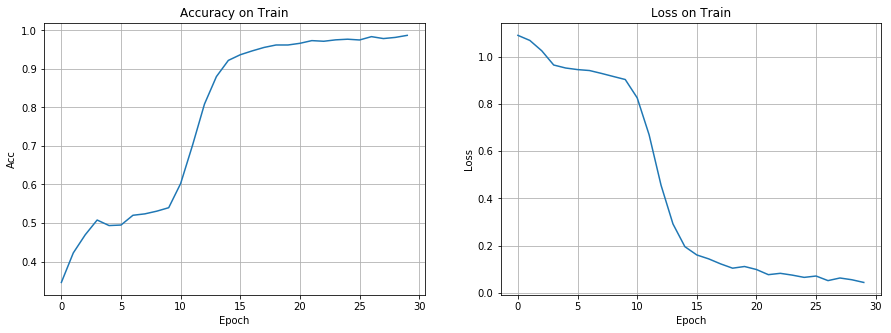

In [33]:
history_allconv = model_allconv.fit(X_train, Y_train_onehot, epochs = 30, verbose = 0)
plot_linear_classifier_history(history_allconv)

In [35]:
metric_values = model_allconv.evaluate(X_test.reshape((-1, IMAGE_SIZE, IMAGE_SIZE, 1)), Y_test)
metric_names = model_allconv.metrics_names

print("Evaluate the model with ADAM optimizer:")
print("-" * 30)
for i, metric in enumerate(metric_names):
    print("%5s: %f" % (metric, metric_values[i]))

300/300 [==============================] - 0s 1ms/step
Evaluate the model with ADAM optimizer:
------------------------------
 loss: 0.057132
  acc: 0.986667


## A Regression Problem

In [84]:
def reorder_ytrain(Y_train):
    
    idx = np.argsort(Y_train[:, [0, 2, 4]],axis = 1)    
    Y_train_new = np.array([Y_train[np.arange(len(Y_train)), 2 * idx[:, i // 2] + i % 2] for i in range(6)])

    return Y_train_new.T

In [92]:
X_train, Y_train = generate_dataset_regression(5000, 20)
Y_train_new = reorder_ytrain(Y_train)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

### Visualization

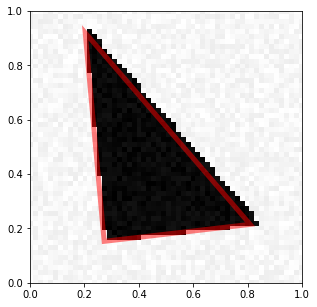

In [93]:
visualize_prediction(X_train[0], Y_train_new[0])

### Model

In [128]:
model_rg = Sequential()

model_rg.add(Convolution2D(32, 3, padding = "same", input_shape = (IMAGE_SIZE, IMAGE_SIZE, 1)))
model_rg.add(Activation('relu'))
model_rg.add(MaxPool2D(pool_size = (2, 2)))
model_rg.add(Dropout(0.1))

model_rg.add(Convolution2D(64, 2, padding = "same"))
model_rg.add(Activation('relu'))
model_rg.add(MaxPool2D(pool_size = (2, 2)))
model_rg.add(Dropout(0.1))

model_rg.add(Convolution2D(128, 2, padding = "same"))
model_rg.add(Activation('relu'))
model_rg.add(MaxPool2D(pool_size = (2, 2)))
model_rg.add(Dropout(0.1))

model_rg.add(Flatten())
model_rg.add(Dense(500, activation='relu'))
model_rg.add(Dropout(0.1))
model_rg.add(Dense(100, activation='relu'))
model_rg.add(Dropout(0.1))

model_rg.add(Dense(6))

sgd = SGD(lr = 0.01, decay = 1e-4, momentum = 0.9,nesterov = True)
model_rg.compile(loss="mean_squared_error", optimizer = sgd)

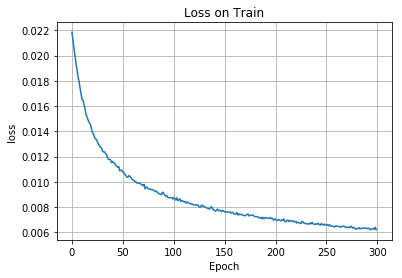

In [130]:
history_rg = model_rg.fit(X_train.reshape((-1, IMAGE_SIZE, IMAGE_SIZE, 1)), Y_train_new, epochs = 300, verbose = 0)
plot_regression_history(history_rg)

### Test

In [118]:
X_test, Y_test = generate_test_set_regression()
Y_test_new = reorder_ytrain(Y_test)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [131]:
metric_values = model_rg.evaluate(X_test.reshape((-1, IMAGE_SIZE, IMAGE_SIZE, 1)), Y_test_new)

print("Evaluate the model with SGD optimizer:")
print("-" * 30)
print("%s: %f" % ("Loss", metric_values))

300/300 [==============================] - 0s 1ms/step
Evaluate the model with SGD optimizer:
------------------------------
Loss: 0.008139


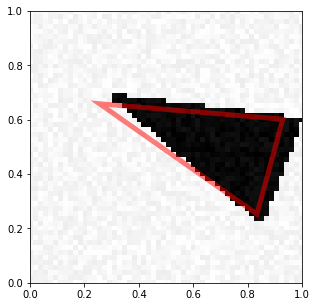

In [143]:
index = 10
Y_test_pred = model_rg.predict(X_test[index].reshape((1, IMAGE_SIZE, IMAGE_SIZE, 1)))
visualize_prediction(X_test[index], Y_test_pred)

## Image Denoising

In [449]:
def generate_dataset_denoising(nb_samples, max_noise=50.0, free_location=True):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples, im_size])
    Y = np.zeros([nb_samples, im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        noise = np.random.randint(max_noise)
        if category == 0:
            Y[i], X[i] = generate_a_rectangle(noise, free_location, pair=True)
        elif category == 1: 
            Y[i], X[i] = generate_a_disk(noise, free_location, pair=True)
        else:
            temp = generate_a_triangle(noise, free_location, pair=True)
            Y[i] = temp[0][0]
            X[i] = temp[0][1]

    return [X.reshape((-1, IMAGE_SIZE, IMAGE_SIZE, 1)), Y.reshape((-1, IMAGE_SIZE, IMAGE_SIZE, 1))]

In [455]:
def visualize_data_pair(X, Y):
    plt.plot()
    plt.subplot(1, 2, 1)
    plt.imshow(np.squeeze(X), cmap = "gray")
    plt.title("Noisy Image")
    plt.subplot(1, 2, 2)
    plt.imshow(np.squeeze(Y), cmap = "gray")
    plt.title("Clean Image")
    plt.show()

In [451]:
X_train, Y_train = generate_dataset_denoising(5000)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

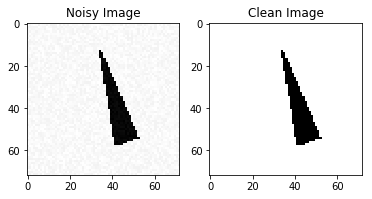

In [456]:
index = 5
visualize_data_pair(X_train[index], Y_train[index])

### Model

[Pix2pix](https://arxiv.org/pdf/1611.07004.pdf)

In [465]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import  Input, BatchNormalization, Lambda, Subtract
from keras.models import Model

In [466]:
def DnCNN():
    inpt = Input(shape=(None,None,1))
    # 1st layer, Conv+relu
    x = Convolution2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(inpt)
    x = Activation('relu')(x)
    # 15 layers, Conv+BN+relu
    for i in range(15):
        x = Convolution2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(x)
        x = BatchNormalization(axis=-1, epsilon=1e-3)(x)
        x = Activation('relu')(x)   
    # last layer, Conv
    x = Convolution2D(filters=1, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = Subtract()([inpt, x])   # input - noise
    model = Model(inputs=inpt, outputs=x)
    
    return model

In [471]:
sgd = SGD(lr = 0.001, decay = 1e-4, momentum = 0.9,nesterov = True)
model_dncnn = DnCNN()
model_dncnn.compile(loss="mean_squared_error", optimizer = sgd)

Epoch 1/30
5000/5000 [==============================] - 31s 6ms/step - loss: 82.0344
Epoch 2/30
5000/5000 [==============================] - 28s 6ms/step - loss: 70.2374
Epoch 3/30
5000/5000 [==============================] - 28s 6ms/step - loss: 63.9455
Epoch 4/30
5000/5000 [==============================] - 28s 6ms/step - loss: 29.2014
Epoch 5/30
5000/5000 [==============================] - 28s 6ms/step - loss: 15.7130
Epoch 6/30
5000/5000 [==============================] - 28s 6ms/step - loss: 12.3600
Epoch 7/30
5000/5000 [==============================] - 28s 6ms/step - loss: 10.9919
Epoch 8/30
5000/5000 [==============================] - 28s 6ms/step - loss: 10.4023
Epoch 9/30
5000/5000 [==============================] - 28s 6ms/step - loss: 9.3551
Epoch 10/30
5000/5000 [==============================] - 28s 6ms/step - loss: 8.9444
Epoch 11/30
5000/5000 [==============================] - 28s 6ms/step - loss: 8.6601
Epoch 12/30
5000/5000 [==============================] - 28s 6ms/s

TypeError: 'History' object is not subscriptable

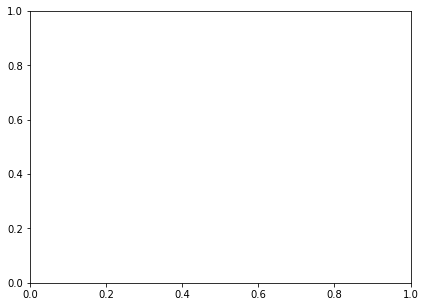

In [472]:
history_dncnn = model_dncnn.fit(X_train, Y_train, epochs = 30, verbose = 0)
plot_regression_history(history_dncnn)

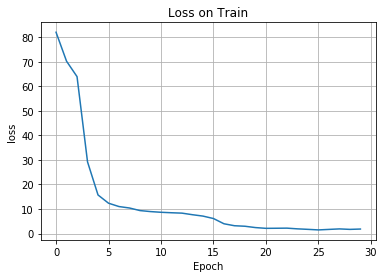

In [474]:
plot_regression_history(history_dncnn)

In [475]:
def generate_test_set_pair():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_denoising(300)
    return [X_test, Y_test]

In [476]:
X_test, Y_test = generate_test_set_pair()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [477]:
metric_values = model_dncnn.evaluate(X_test, Y_test)

print("Evaluate the model with SGD optimizer:")
print("-" * 30)
print("%s: %f" % ("Loss", metric_values))

300/300 [==============================] - 2s 6ms/step
Evaluate the model with SGD optimizer:
------------------------------
Loss: 1.337864


In [484]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

PSNR (X, Y_true): 27.765155
PSNR (X, Y_hat): 27.701996
PSNR (Y_hat, Y_true): 48.760614
--------------------------------------------------


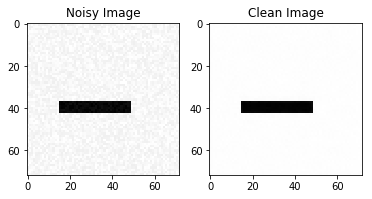

In [493]:
index = 10
Y_test_pred = model_dncnn.predict(X_test[index].reshape((1, IMAGE_SIZE, IMAGE_SIZE, 1)))

print("PSNR (X, Y_true): %f" % (psnr(X_test[index], Y_test[index])))
print("PSNR (X, Y_hat): %f" % (psnr(X_test[index], Y_test_pred)))
print("PSNR (Y_hat, Y_true): %f" % (psnr(Y_test[index], Y_test_pred)))
print("-" * 50)
visualize_data_pair(X_test[index], Y_test_pred)